# Quiz 11 Answers

In [2]:
# Working with data:
import numpy  as np                                   # For scientific computing.
import pandas as pd                                   # Working with tables.

# Downloading files:
import requests, zipfile, io                                # To access websites.

import os

# Specific data providers:
from tiingo import TiingoClient                       # Stock prices.
import quandl                                         # Economic data, futures prices, ...

# API keys:
tiingo = TiingoClient({'api_key':'XXXX'})
quandl.ApiConfig.api_key = 'YYYY'

# Plotting:
import matplotlib.pyplot as plt                        # Basic plot library.
plt.style.use('ggplot')                                # Make plots look nice

Q1:

In [3]:
x = pd.read_csv('data/sec/merged/2015q4.csv', parse_dates=['filed','ddate'])
x

,cik,sic,countryinc,tag,filed,ddate,qtrs,value
0,3545,100.0,US,AccountsPayableCurrent,2015-12-10,2014-09-30,0,2.053000e+06
1,3545,100.0,US,AccountsPayableCurrent,2015-12-10,2015-09-30,0,4.022000e+06
2,3545,100.0,US,AccountsReceivableNetCurrent,2015-12-10,2014-09-30,0,8.441000e+06
3,3545,100.0,US,AccountsReceivableNetCurrent,2015-12-10,2015-09-30,0,4.252000e+06
4,3545,100.0,US,AccruedLiabilitiesCurrent,2015-12-10,2014-09-30,0,4.227000e+06
...,...,...,...,...,...,...,...,...
2226063,801348,6500.0,US,PartnershipPercentOfAssetsInvestedInDirectOwne...,2015-11-12,2015-09-30,0,6.500000e-01
2226064,801348,6500.0,US,UnitsOfPartnershipInterestHigherUnitValueRange,2015-11-12,2014-12-31,0,3.669300e+00
2226065,801348,6500.0,US,UnitsOfPartnershipInterestHigherUnitValueRange,2015-11-12,2015-09-30,0,3.921700e+00
2226066,801348,6500.0,US,UnitsOfPartnershipInterestLowerUnitValueRange,2015-11-12,2014-12-31,0,2.851900e+00


In [4]:
len(x[x.tag=='CashAndCashEquivalentsAtCarryingValue'])

23701

Q2:

In [5]:
def get_items_from_SEC_files(tags, filename=None):                # Function input: list of tags, optional filename.

    directory = 'data/sec/merged/'                                # Read data from here.
    filenames = [filename] if filename else os.listdir(directory) # Supplied filename or all files in "merged" directory.
    filenames = [f for f in filenames if not f.startswith(".")]   # Exclude hidden files from file list.

    results   = {t:pd.DataFrame() for t in tags}                  # Dictionary of tables (1 table for each tag)

    for filename in sorted(filenames):                            # Loop over all files.
        print(filename)
        data = pd.read_csv(directory+filename, parse_dates=['filed','ddate'])  # Read the file.
        
        for t in tags:                                            # Loop over all tags.
            item  = data[data.tag==t]                             # Select all data for this tag.
            short = item.sort_values(['cik','filed','ddate','qtrs'], ascending=[True,True,True,False]) # Samllest qrts.
            long  = item.sort_values(['cik','filed','ddate','qtrs'], ascending=[True,True,True,True])  # Largest  qtrs.
            short = short.groupby(['cik','filed']).last()[['value','qtrs']]     # One value for each firm and filing.
            long  = long .groupby(['cik','filed']).last()[['value','qtrs']]     
            short_long = short.join(long, lsuffix='_shortest', rsuffix='_longest') # Put shortest and longest next to each other.
            results[t] = results[t].append( short_long )  
                        
    for t in tags:                                                # Now sort all tables by filing date.
        if not results[t].empty: results[t] = results[t].sort_index(level='filed')            

    return results



tags = ['NetIncomeLossAvailableToCommonStockholdersBasic','NetIncomeLoss','ProfitLoss']

items = get_items_from_SEC_files(tags)

2009q1.csv
2009q2.csv
2009q3.csv
2009q4.csv
2010q1.csv
2010q2.csv
2010q3.csv
2010q4.csv
2011q1.csv
2011q2.csv
2011q3.csv
2011q4.csv
2012q1.csv
2012q2.csv
2012q3.csv
2012q4.csv
2013q1.csv
2013q2.csv
2013q3.csv
2013q4.csv
2014q1.csv
2014q2.csv
2014q3.csv
2014q4.csv
2015q1.csv
2015q2.csv
2015q3.csv
2015q4.csv
2016q1.csv
2016q2.csv
2016q3.csv
2016q4.csv
2017q1.csv
2017q2.csv
2017q3.csv
2017q4.csv
2018q1.csv
2018q2.csv
2018q3.csv
2018q4.csv
2019q1.csv
2019q2.csv
2019q3.csv
2019q4.csv
2020_10.csv
2020_11.csv
2020_12.csv
2020q1.csv
2020q2.csv
2020q3.csv
2021_01.csv
2021_02.csv
2021_03.csv


In [6]:
symbols = pd.read_csv('data/ticker_symbols/symbols.csv',index_col=0)     # read table with ticker symbols

In [7]:
cik = symbols[symbols.ticker=='XOM'].index[0]

t = [items[tag].loc[cik].value_longest.rename(tag) for tag in tags if cik in items[tag].index]
pd.concat(t, 'columns')

,NetIncomeLoss,ProfitLoss
filed,,
2009-08-05,8.500000e+09,8.648000e+09
2009-11-05,1.323000e+10,1.351900e+10
2010-02-26,1.928000e+10,1.965800e+10
2010-05-06,6.300000e+09,6.575000e+09
2010-08-04,1.386000e+10,1.432100e+10
2010-11-03,2.121000e+10,2.188200e+10
2011-02-25,3.046000e+10,3.139800e+10
2011-05-05,1.065000e+10,1.091300e+10
2011-08-04,2.133000e+10,2.181100e+10


Q3:

In [8]:
def combine_items(tags, items):
    result = items[tags[0]]
    for tag in tags[1:]:  result = result.combine_first( items[tag] )
    return result


tags  = ['NetIncomeLossAvailableToCommonStockholdersBasic','NetIncomeLoss','ProfitLoss']

items['earnings'] = combine_items(tags, items)

In [9]:
cik = symbols[symbols.ticker=='WMT'].index[0]

items['earnings'].loc[cik].loc['2018-09-06']

value_shortest    -861000000.0
qtrs_shortest                1
value_longest     1273000000.0
qtrs_longest                 2
Name: 2018-09-06 00:00:00, dtype: object

Q4:

In [10]:
def calculate_quarterly_annual_values(item):                        # item: table with shortest and longest values and quarters.
    result           = pd.DataFrame()                               # Results go here.
    all_firms        = item.index.get_level_values('cik').unique()  # All CIKs.
    all_filing_dates = pd.read_csv('data/sec/dates/filing_dates.csv', index_col='cik', parse_dates=['filed'])
    
    for cik in all_firms:                                           # Loop over all firms.  
        filing_dates = pd.Series(all_filing_dates.filed[cik])       # All filing dates for this firm.

        # Quarterly values:
        valuesQ = item.loc[cik].value_shortest.reindex(filing_dates) # Values with shortest reported quarters.
        qtrsQ   = item.loc[cik].qtrs_shortest.astype(int)           # Number of quarters for each value.
        for date,q in qtrsQ[qtrsQ>1].iteritems():                   # Loop over all dates with > 1 quarters. 
            previous_values = valuesQ[:date][-q:-1]                 # Example: for q=3 we need to subtract 2 previous quarters.            
            if len(previous_values) == q-1:                         # If all previous values available.
                valuesQ[date] -= previous_values.sum(skipna=False)  # Subtract previous values to get quarterly value.
            else:
                valuesQ[date]  = np.nan                  

        # Annual values:
        valuesA = item.loc[cik].value_longest.reindex(filing_dates) # Values with longest reported quarters.
        qtrsA   = item.loc[cik].qtrs_longest.astype(int)            # Number of quarters for each value.
        for date,q in qtrsA[qtrsA<4].iteritems():                   # Loop over all dates with < 4 quarters. 
            previous_values = valuesQ[:date][-4:-q]                 # Example: for q=2 we need to add quarters -3 and -4.
            if len(previous_values) == 4-q:                         # If all previous data available.     
                valuesA[date] += previous_values.sum(skipna=False)  # Add previous values to get annual values.
            else:
                valuesA[date]  = np.nan        
        
        result = result.append( pd.DataFrame({'cik':cik, 'filed':filing_dates, 'valueQ':valuesQ.values, 'valueA':valuesA.values}) )

    return result.set_index(['cik','filed'])                        # Return a table with columns 'valueQ' and 'valueA'.



earnings = calculate_quarterly_annual_values(items['earnings'])

In [11]:
earnings.valueQ.nsmallest(5)

cik      filed     
1067983  2020-05-04   -4.974600e+10
1419242  2012-02-29   -2.983000e+10
1067983  2019-02-25   -2.539200e+10
40545    2018-10-30   -2.280800e+10
34088    2021-02-24   -2.007000e+10
Name: valueQ, dtype: float64

In [17]:
symbols.join( earnings.valueQ.nsmallest(5) )

,,ticker,title,exchange,assetType,priceCurrency,startDate,endDate,valueQ
cik,filed,,,,,,,,
1067983,2020-05-04,BRK-A,BERKSHIRE HATHAWAY INC,NYSE,Stock,USD,1980-03-17,2021-04-16,-4.974600e+10
1419242,2012-02-29,AT,ATLANTIC POWER CORP,NYSE,Stock,USD,2009-12-03,2021-04-16,-2.983000e+10
1067983,2019-02-25,BRK-A,BERKSHIRE HATHAWAY INC,NYSE,Stock,USD,1980-03-17,2021-04-16,-2.539200e+10
40545,2018-10-30,GE,GENERAL ELECTRIC CO,NYSE,Stock,USD,1962-01-02,2021-04-16,-2.280800e+10
34088,2021-02-24,XOM,EXXON MOBIL CORP,NYSE,Stock,USD,1970-01-02,2021-04-16,-2.007000e+10


Q6:

In [12]:
trading_days = pd.to_datetime( tiingo.get_dataframe('SPY','2009-04-15').index ).tz_convert(None)

In [13]:
def ffill_values(item, dates):                                          
    data = item.unstack('cik')
    data = data.reindex(dates.union(data.index)).sort_index()           # Add specified dates to index.
    filing_dates = pd.read_csv('data/sec/dates/filing_dates.csv', index_col='cik', parse_dates=['filed']).filed
    last_filing_date_all_firms = filing_dates.max()                     # Most recent date where at least 1 firm filed.
     
    for cik in data.columns:                                            # Loop over all firms.
        last_filing_date      = pd.Series(filing_dates[cik]).iloc[-1]   # Last date where this firm filed
        days_since_last_filed = (last_filing_date_all_firms - last_filing_date).days
        last_date_this_firm   = dates[-1] if days_since_last_filed < 120 else last_filing_date
        data.loc[:last_date_this_firm, cik].ffill(inplace=True)         # Forward fill all the values.

    return data.loc[dates]                                              # Return only specified dates.   


earningsQ = ffill_values( earnings.valueQ,  trading_days )
earningsA = ffill_values( earnings.valueA,  trading_days )

In [14]:
EARNINGSQ = earningsQ.rename(columns=symbols.ticker)
EARNINGSA = earningsA.rename(columns=symbols.ticker)

In [15]:
EARNINGSQ[:'2018'].iloc[-1].nlargest(5).sum() / 10**9

58.629

Q7:

In [16]:
firms = EARNINGSA[:'2014'].iloc[-1].nlargest(10).index
firms

Index(['AAPL', 'XOM', 'WFC', 'MSFT', 'BRK-A', 'CVX', 'JPM', 'T', 'JNJ', 'VZ'], dtype='object', name='cik')

In [20]:
PRICE = pd.read_csv('data/tiingo/close.csv', index_col='date', parse_dates=['date'])
RET = pd.read_csv('data/tiingo/adjClose.csv', index_col='date', parse_dates=['date']).pct_change() 
VOLUME = pd.read_csv('data/tiingo/volume.csv', index_col='date', parse_dates=['date'])
DOLLAR_VOLUME = VOLUME * PRICE

In [21]:
volume = DOLLAR_VOLUME[firms][:'2014'].iloc[-1].sort_values()
volume

BRK-A    4.135800e+07
WFC      5.531784e+08
JNJ      6.485555e+08
VZ       6.563020e+08
CVX      7.192752e+08
T        8.121409e+08
MSFT     1.001111e+09
XOM      1.048126e+09
JPM      1.159571e+09
AAPL     4.570102e+09
Name: 2014-12-31 00:00:00, dtype: float64

In [22]:
symbols[symbols.ticker.isin( volume.index )]

,ticker,title,exchange,assetType,priceCurrency,startDate,endDate
cik,,,,,,,
19617,JPM,JPMORGAN CHASE & CO,NYSE,Stock,USD,1983-12-30,2021-04-16
34088,XOM,EXXON MOBIL CORP,NYSE,Stock,USD,1970-01-02,2021-04-16
72971,WFC,WELLS FARGO & COMPANY/MN,NYSE,Stock,USD,1972-06-01,2021-04-16
93410,CVX,CHEVRON CORP,NYSE,Stock,USD,1970-01-02,2021-04-16
200406,JNJ,JOHNSON & JOHNSON,NYSE,Stock,USD,1970-01-02,2021-04-16
320193,AAPL,Apple Inc.,NASDAQ,Stock,USD,1980-12-12,2021-04-16
732712,VZ,VERIZON COMMUNICATIONS INC,NASDAQ,Stock,USD,1983-11-21,2021-04-16
732717,T,AT&T INC.,NYSE,Stock,USD,1984-07-19,2021-04-16
789019,MSFT,MICROSOFT CORP,NASDAQ,Stock,USD,1986-03-13,2021-04-16


Q8:

In [23]:
firms = DOLLAR_VOLUME.loc['2018'].mean().nlargest(500)
firms

AMZN    9.133230e+09
AAPL    6.319999e+09
FB      4.624330e+09
NFLX    3.650945e+09
BABA    3.567039e+09
            ...     
IFF     1.066353e+08
DGX     1.065696e+08
VIPS    1.065139e+08
IPG     1.064656e+08
FTI     1.063051e+08
Length: 500, dtype: float64

In [24]:
VOLUME[firms.index][:'2019'].iloc[-1].sum()  / 10**9

1.730147315

Q9:

In [25]:
firms = EARNINGSA[:'2012'].iloc[-1].nlargest(10)#.index
firms

cik
XOM     4.433000e+10
AAPL    4.173300e+10
AIG     2.719400e+10
CVX     2.405700e+10
JPM     1.798500e+10
F       1.768200e+10
WFC     1.703000e+10
WMT     1.655600e+10
IBM     1.626000e+10
MSFT    1.482000e+10
Name: 2012-12-31 00:00:00, dtype: float64

In [26]:
RET[firms.index]['2013':'2021-3']

,XOM,AAPL,AIG,CVX,JPM,F,WFC,WMT,IBM,MSFT
date,,,,,,,,,,
2013-01-02,0.024957,0.031676,0.033428,0.020806,0.022536,0.019305,0.025453,0.014803,0.025059,0.034081
2013-01-03,-0.001804,-0.012630,-0.008224,-0.004258,-0.002015,0.019697,-0.008274,-0.006355,-0.005500,-0.013396
2013-01-04,0.004630,-0.027847,0.003317,0.005277,0.017725,0.008172,0.005178,0.003779,-0.006555,-0.018716
2013-01-07,-0.011578,-0.005882,-0.010193,-0.006787,0.001102,-0.010317,-0.004865,-0.009557,-0.004382,-0.001870
2013-01-08,0.006255,0.002691,-0.007793,-0.004465,0.001982,-0.005957,-0.001726,0.002778,-0.001398,-0.005245
...,...,...,...,...,...,...,...,...,...,...
2021-03-25,-0.002840,0.004164,0.033563,0.003534,0.012814,0.014827,0.030955,0.006761,0.018757,-0.013251
2021-03-26,0.027234,0.005141,0.006882,0.022937,0.016650,-0.001623,0.011705,0.008358,0.024874,0.017819
2021-03-29,-0.005372,0.001485,-0.005126,-0.005210,-0.015539,-0.012195,-0.033199,0.011396,-0.003813,-0.005244


In [27]:
RET[firms.index]['2013':'2021-3'].add(1).cumprod().sum('columns') * 1000

date
2013-01-02    10252.104418
2013-01-03    10207.973634
2013-01-04    10202.989526
2013-01-07    10137.224370
2013-01-08    10124.026646
                  ...     
2021-03-25    32072.537002
2021-03-26    32493.163198
2021-03-29    32316.620624
2021-03-30    32173.203991
2021-03-31    32309.361406
Length: 2076, dtype: float64

Q10:

In [29]:
def get_rebalance_dates(frequency, start_date):
    price = PRICE[PRICE.index>start_date]
    group = getattr(price.index, frequency) 
    return price[:1].index.union(price.groupby([price.index.year, group]).tail(1).index)



def run_backtest(frequency, backtest_start='1900-1-1'):   
    
    rebalance_dates = get_rebalance_dates(frequency, backtest_start) 

    portfolio_value = pd.Series(1,                        index=[rebalance_dates[0]])    
    weights         = pd.DataFrame(columns=PRICE.columns, index=[rebalance_dates[0]])
    trades          = pd.DataFrame(columns=PRICE.columns, index=[rebalance_dates[0]])

    previous_positions = weights.iloc[0]
        
    for i in range(1, len(rebalance_dates)-1):
        start_date = rebalance_dates[i]
        end_date   = rebalance_dates[i+1]

        cum_ret = RET[start_date:end_date][1:].add(1).cumprod()
        
        assets        = select_assets(start_date)               # Call "select_assets()"  function to get the assets.
        start_weights = select_weights(start_date, assets)      # Call "select_weights()" function to get the weights
            
        new_positions = portfolio_value.iloc[-1] * start_weights   

        start_to_end_positions = new_positions * cum_ret
        start_to_end_value     = start_to_end_positions.sum('columns')

        portfolio_value = portfolio_value.append(start_to_end_value) 
                
        weights = weights.append(start_to_end_positions.div(start_to_end_value,'rows'))                 
                
        trades.loc[start_date] = new_positions - previous_positions 
        previous_positions     = start_to_end_positions.iloc[-1]      # Previous positions for the next rebalance round

    return portfolio_value.pct_change(), weights, trades

<AxesSubplot:>

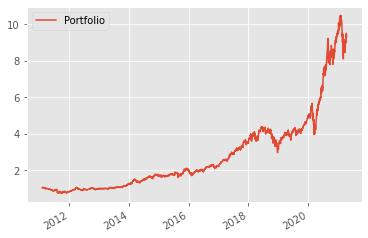

In [31]:
def select_assets(date):
    return DOLLAR_VOLUME[:date][-100:].mean().nlargest(5).index 


def select_weights(date, assets): 
    return pd.Series(1/len(assets), index=assets)   


portfolio, weights, trades = run_backtest('month','2011-1-1')

t = pd.DataFrame(portfolio.rename('Portfolio'))#.join(vti.pct_change())
t.add(1).cumprod().plot()

In [32]:
portfolio.add(1).cumprod()[:'2021-3'] * 100

2011-01-03           NaN
2011-02-01    102.322496
2011-02-02    101.759779
2011-02-03    101.902467
2011-02-04    101.995415
                 ...    
2021-03-25    856.628563
2021-03-26    848.192383
2021-03-29    844.461005
2021-03-30    852.943435
2021-03-31    875.824141
Length: 2559, dtype: float64